In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, InputLayer
import matplotlib.pyplot as plt

In [2]:
(X_treinamento, _), (X_teste, _) = mnist.load_data()
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [3]:
X_treinamento.shape, X_teste.shape

((60000, 784), (10000, 784))

In [4]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(784,)))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu'))

# Decodificador
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
autoencoder.fit(X_treinamento, X_treinamento, epochs=50, batch_size=256,
                validation_data=(X_teste, X_teste))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0058 - loss: 0.3378 - val_accuracy: 0.0111 - val_loss: 0.1710
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0118 - loss: 0.1609 - val_accuracy: 0.0104 - val_loss: 0.1372
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0135 - loss: 0.1350 - val_accuracy: 0.0135 - val_loss: 0.1261
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0141 - loss: 0.1254 - val_accuracy: 0.0142 - val_loss: 0.1183
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0123 - loss: 0.1187 - val_accuracy: 0.0104 - val_loss: 0.1141
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0120 - loss: 0.1146 - val_accuracy: 0.0119 - val_loss: 0.1099
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0113 - loss: 0.1106 - val_accuracy: 0.0124 - val_loss: 0.1069
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0125 - loss: 0.1074 - val_accuracy: 0.

In [7]:
# 784 -> 128 -> 64 -> 32
dimensao_original = Input(shape=(784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]
encoder = Model(dimensao_original, camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))
encoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
imagens_codificadas = encoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


In [9]:
imagens_codificadas.shape

(10000, 32)

In [10]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


In [11]:
imagens_decodificadas.shape

(10000, 784)

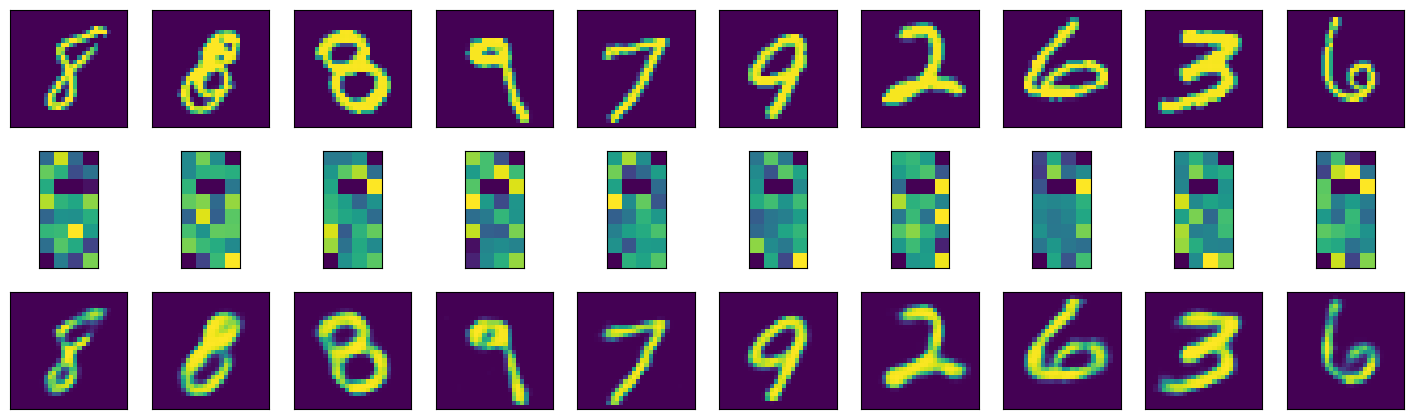

In [12]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):
    # imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_teste[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())

    # imagem reconstruída
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
